# outlier detection

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle
from sklearn.manifold import TSNE
import umap
import mpld3

full_data = np.load("full_data.npy")

full_data.shape
reshaped_data = full_data.reshape(2500, 784)

weird_points = [1781, 536, 1145, 533, 1720, 1328, 1156, 722, 904, 360, 124, 842, 1859, 2496, 392, 1038, 947, 2322, 156, 2138, 193, 2140, 572, 1414]
def plot_lc(emedded_mat, title, outliers=None, baseline_outliers=weird_points, save_plot=False):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    N = len(x)
    hehe = []
    s = []
    shapes = []
    for i in range(N):
        if i == 1156:
            hehe.append('r')
            s.append(80)
        if i in baseline_outliers:
            hehe.append('g')
            s.append(30)
            shapes.append("x")
        else:
            hehe.append("#660066")
            s.append(1)
            shapes.append(".")
        
    hehe = np.array(hehe)
    s = np.array(s)
    
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         s=s,
                         alpha=0.3,
                         zorder=10)
    ax.grid(color='white', linestyle='solid', zorder=0)

    ax.set_title(title, size=15)
    
    if save_plot:
        plt.savefig("final_images/" + str(title) +".ps", dpi=1500)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)

In [72]:
p = 200
ee = 10
lr = 40

model_tsne_2 = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=lr)
embeddings_tsne_784_2 = model_tsne_2.fit_transform(reshaped_data)
print model_tsne_2.kl_divergence_

0.710447728634


In [14]:
neighbors = 200
min_dist = 1.0

model_umap_2 = umap.UMAP(n_neighbors=neighbors, min_dist=min_dist)
embeddings_umap_784_2 = model_umap_2.fit_transform(reshaped_data)

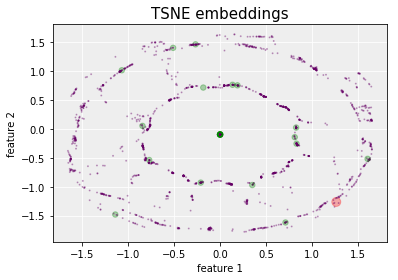

In [73]:
plot_lc(embeddings_tsne_784_2, "TSNE embeddings")

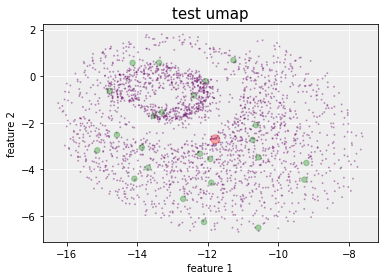

In [15]:
plot_lc(embeddings_umap_784_2, "UMAP embeddings")

# final outliers finding

In [48]:
from sklearn.metrics import pairwise_distances
from scipy.spatial import cKDTree

kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')


def real_plot(num):
    x = kdata[num][0]
    y = kdata[num][1]
    y_err = kdata[num][2]
    plt.errorbar(x, y, yerr=y_err,fmt=".")
    plt.show()

def find_outliers(distances, metric='min', name="test", show_outliers=True, cutoff=3, limit=10, title=None, savefig=False, r=1):
    if metric == 'ball':
        if r is None:
            r = 1
        lookup_tree = cKDTree(embeddings_tsne_784_2)
        ball_count = []
        print r
        for point in embeddings_tsne_784_2:
            ball_count.append(len(lookup_tree.query_ball_point(point, r)))
        distribution = np.array(ball_count)
        average = np.mean(distribution)
        std = np.std(distribution)
        normalized = np.apply_along_axis(lambda x: (x-average)/std, 0, distribution)
        plt.title("NNeighbors in Ball of radius" + str(r) + "distance distribution for embedding: " + name)
        plt.hist(normalized, bins=100)
        plt.show()
        outliers = [i for i, _ in enumerate(normalized) if normalized[i] > cutoff]
        if neg_cutoff:
            for i, _ in enumerate(normalized):
                if normalized[i] < neg_cutoff:
                    outliers.append(i)
        
        if show_outliers:
            count = 0
            for i in outliers:
                count += 1
                if count > limit:
                    break
                plt.title("outlier " + str(i) + " for embeddings: " + name)
                real_plot(i)
                print normalized[i]
    elif metric == 'average':
        distribution = np.mean(distances, axis=1)
        average = np.mean(distribution)
        std = np.std(distribution)
        normalized = np.apply_along_axis(lambda x: (x-average)/std, 0, distribution)
        if title is None:
            plt.title("mean distance distribution for embedding: " + name)
        else:
            plt.title(title)
        plt.hist(normalized, bins=100)
        if savefig:
            plt.ylabel('Frequency')
            plt.xlabel('Normalized Nearest Neighbor Distance')
            plt.savefig("final_images/"+title + ".ps", dpi=100)
        plt.show()
        outliers = [i for i, _ in enumerate(normalized) if normalized[i] > cutoff]
        if show_outliers:
            count = 0
            for i in outliers:
                count += 1
                if count > limit:
                    break
                plt.title("outlier " + str(i) + " for embeddings: " + name)
                real_plot(i)
                print normalized[i]
        return outliers
    elif metric == 'min':
        distribution = []
        for i, _ in enumerate(distances):
            min_elem = np.min(np.concatenate((distances[i,:i], distances[i, i+1:]), axis=None))
            distribution.append(min_elem)
        distribution = np.array(distribution)
        average = np.mean(distribution)
        std = np.std(distribution)
        normalized = np.apply_along_axis(lambda x: (x-average)/std, 0, distribution)
        if title is None:
            plt.title("mean distance distribution for embedding: " + name)
        else:
            plt.title(title)
        plt.hist(normalized, bins=100)
        if savefig:
            plt.ylabel('Frequency')
            plt.xlabel('Normalized Nearest Neighbor Distance')
            plt.savefig("final_images/" + title + ".ps", dpi=100)
        plt.show()
        outliers = [i for i, _ in enumerate(normalized) if normalized[i] > cutoff]
        if show_outliers:
            count = 0
            for i in outliers:
                count += 1
                if count > limit:
                    break
                plt.title("outlier " + str(i) + " for embeddings: " + name)
                real_plot(i)
                print normalized[i]
        return outliers

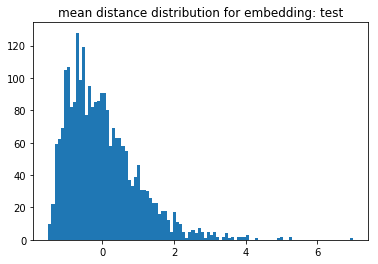

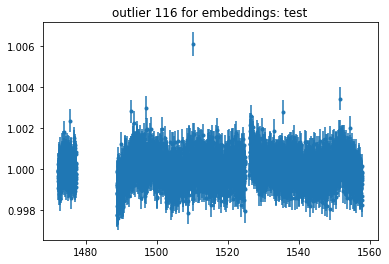

6.9947195


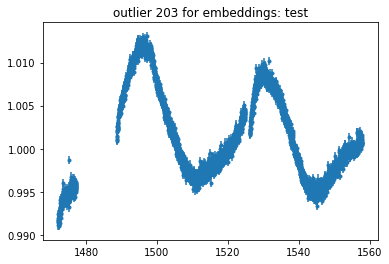

4.9418573


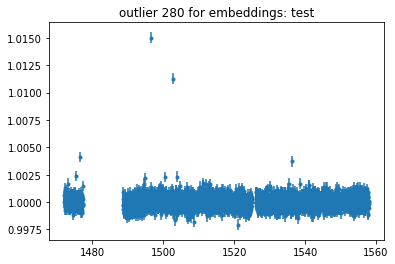

5.2926683


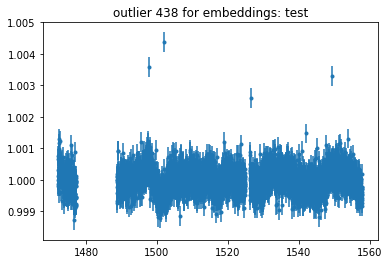

4.9745107


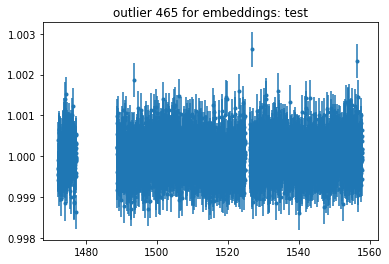

4.0397563


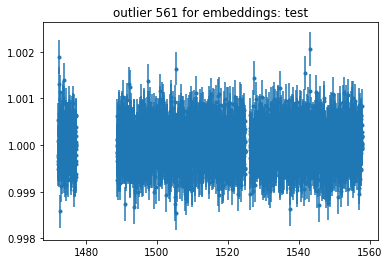

5.031386


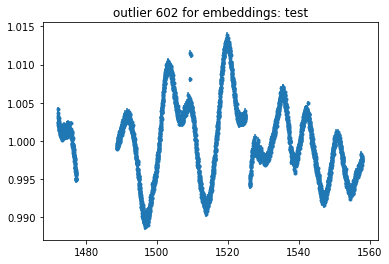

4.27342


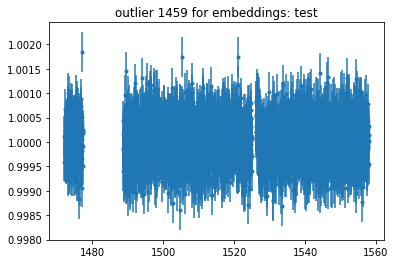

4.0887203


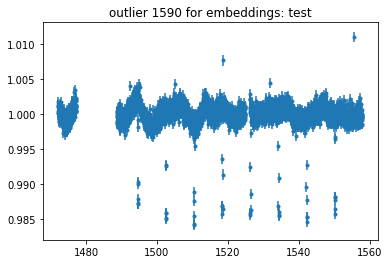

4.059335


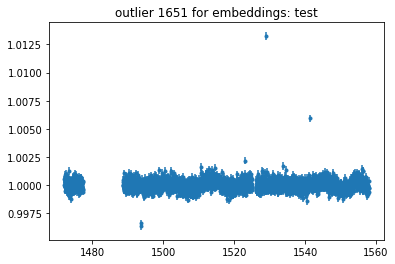

5.2133923


[116, 203, 280, 438, 465, 561, 602, 1459, 1590, 1651]

In [49]:
distances = pairwise_distances(embeddings_umap_784_2)
find_outliers(distances, metric='min', cutoff=4)

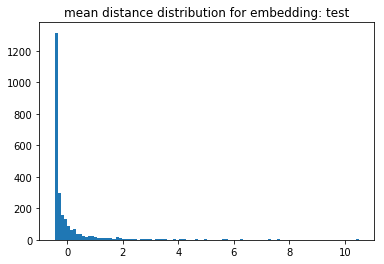

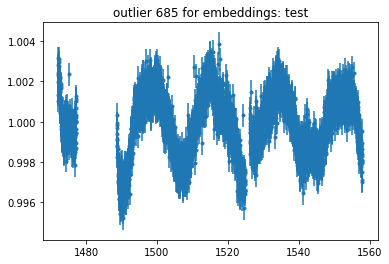

7.5958266


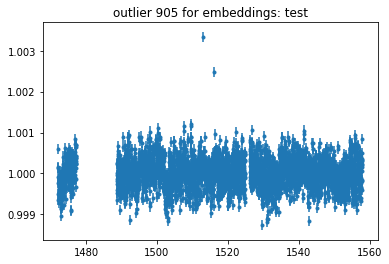

9.035464


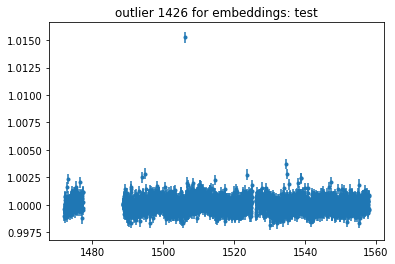

10.502648


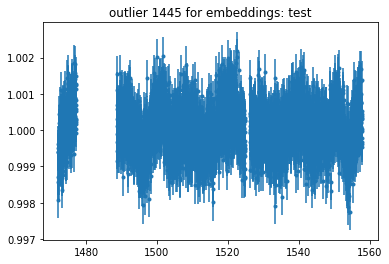

7.299036


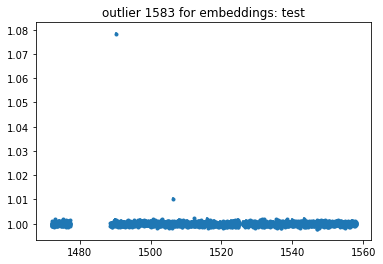

7.5958266


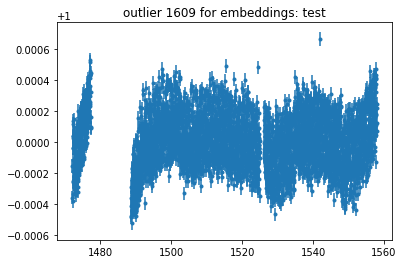

9.515237


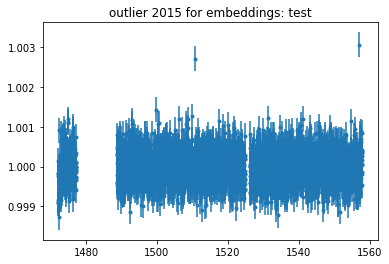

10.479311


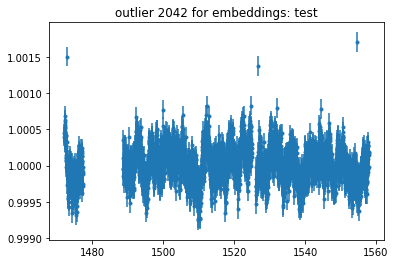

7.221393


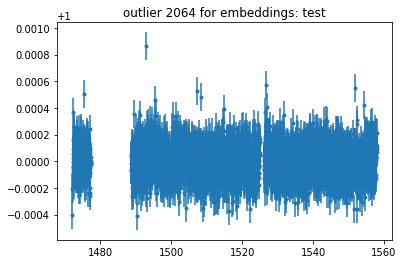

8.157584


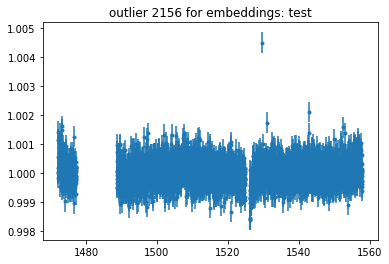

8.567803


[685, 905, 1426, 1445, 1583, 1609, 2015, 2042, 2064, 2156]

In [69]:
distances = pairwise_distances(embeddings_tsne_784_2)
find_outliers(distances, metric='min', cutoff=6.6)